In [1]:
from dataloader import DataLoader

In [2]:
loader = DataLoader(128, train=True)

print("CELEBA")
print(len(loader.celeba_train))
# print(len(loader.celeba_valid))
# print(len(loader.celeba_test))

print()
print("WIDER")
print(len(loader.wider_train))
# print(len(loader.wider_valid))

CELEBA
162770

WIDER
12880


In [7]:
img, face, bbox, lm = next(iter(loader.next_batch()))

print(img.shape, face.shape, bbox.shape, lm.shape, sep="\n")

(128, 3, 48, 48)
(128,)
(128, 4)
(128, 10)


In [8]:
# print(lm)

# print(bbox)

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

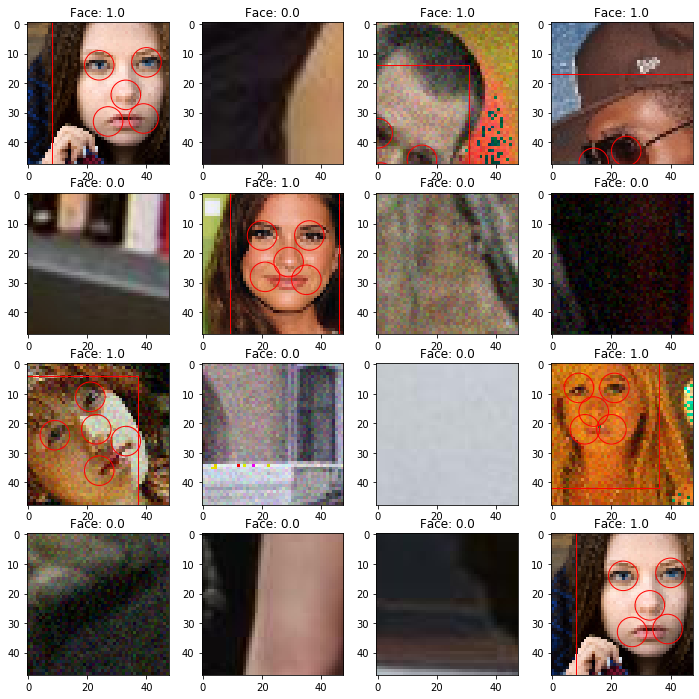

In [10]:
fig = plt.figure(figsize=(12, 12))

for ind, i in enumerate(np.random.choice(np.arange(128), size=16)):
    sample = img[i]
    sample[sample < -0.5] = -0.5
    sample[sample > 0.5] = 0.5
    
    sample = sample * 256 + 128
    sample = sample.astype(np.uint8)
    
    sample = sample.transpose(1, 2, 0)
    
    ax = fig.add_subplot(4, 4, ind+1)
    ax.imshow(sample)
    
    f = face[i]
    plt.title(f"Face: {f}")
    if f == 1:
        x, y, w, h = bbox[i]
        # print(bbox[i])
        # print(x*sample.shape[1], y*sample.shape[0])
        rect = patches.Rectangle((int(x*sample.shape[1]), int(y*sample.shape[0])), int(w*sample.shape[1]), int(h*sample.shape[0]),
                                 linewidth=1, edgecolor='r', facecolor="none")
        
        ax.add_patch(rect)
        
        for j in range(5):
            x, y = lm[i][2*j:2*(j+1)]
            
            # print(x, y)
            
            circle = patches.Circle((int(x*sample.shape[1]), int(y*sample.shape[0])), linewidth=1, edgecolor="r", facecolor="none")
            ax.add_patch(circle)
    
plt.show()